In [22]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import random
import os
import urllib.request
import tarfile
import pickle

from utils import buildNetwork, load_cifar,download_cifar

# URL for the data-set on the internet.
data_path = "data/CIFAR-10/"
data_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

In [2]:
# Let's start a Session
sess = tf.Session()

## Download CIFAR-10 (only needs to be run once)

In [5]:
download_cifar(data_path, data_url)

Download finished. Extracting files.
Done.


## Loading CIFAR-10 into memory

In [6]:
train_samples, train_labels, val_samples, val_labels = load_cifar(data_path)

## Task: Use matplotlib to plot 5 random *training* samples and print the corresponding class label

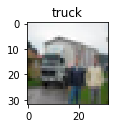

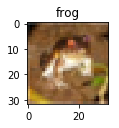

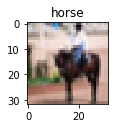

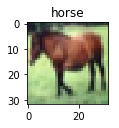

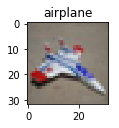

In [34]:
label_to_name = ['airplane', 'automobile', 'bird', 'cat', 'deer' , 'dog', 'frog', 'horse', 'ship', 'truck']
indeces = random.sample(range(0, 31), 5)
# TODO plot 5 training samples
for index in indeces:
    plt.figure(figsize=(1.5,1.5))
    plt.title(label_to_name[train_labels[index]])
    plt.imshow(train_samples[index])




## Building Tensorflow Graph

In [35]:
HEIGHT = 32
WIDTH = 32
CHANNELS = 3
NUM_CLASSES = 10

# You can also modify these hyper-parameters (batch_size, epochs)
# e.g. Add more epochs, if not converged. Reduce batch_size if too big for your GPU memory
batch_size = 50  
num_train_epochs = 10
steps_per_epoch = train_samples.shape[0] / batch_size

In [51]:
# TODO define placeholders for the inputs and their labels (hint: what is their type, shape?)

inputs = tf.placeholder(tf.float32,name='input',shape=[batch_size,WIDTH,HEIGHT,CHANNELS])
labels = tf.placeholder(tf.int32,name='output',shape=[batch_size])

logits = buildNetwork(inputs, batch_size)

## Task: Build the Loss. Add weight regularization.

In [57]:
# TODO add an appropriate cross entropy loss function
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels,logits=logits,name='crossEntropy')

# TODO use reduce_mean to combine the single loss values from all the different input samples
meanLoss= tf.reduce_mean(loss)

# TODO add L2 regularization
alpha=0.5
tvars =tf.trainable_variables()
l2_reg = tf.reduce_sum([tf.nn.l2_loss(var) for var in tvars])
loss = meanLoss+alpha*l2_reg
# hint: use tf.trainable_variables() and tf.nn.l2_loss(var)


In [58]:
# Compute accuracy as an evaluation metric
predictions = tf.to_int32(tf.argmax(logits, axis=1))
correct_mask = tf.to_float(tf.equal(predictions, labels))
accuracy = tf.reduce_mean(correct_mask)

## Task: Define Learning Rate, Optimizer and Training Operation

In [67]:
# TODO define the learning rate
learningRate = 0.1
# TODO define the optimizer (experiment with different options)
opt = tf.train.GradientDescentOptimizer(learning_rate=learningRate)
# TODO build the corresponding training operation
opt_op = opt.minimize(loss)

In [68]:
# Define summary operations. Note, that the names may vary depending on how you defined variables!

train_summaries = [
  tf.summary.scalar('train_loss', loss),
  tf.summary.scalar('train_accuracy', accuracy)
]
train_summary_op = tf.summary.merge(train_summaries)

val_accuracy = tf.placeholder(tf.float32)
val_summary_op = tf.summary.scalar('val_accuracy', val_accuracy)

# Define a single summary writer, which will take care of writing
# our summary representations to disk.
writer = tf.summary.FileWriter('log')

## Task: Initialize the variables

In [69]:
# TODO use the variables initializer to build the operation and run it in the current session (named sess)
model = tf.global_variables_initializer()
sess.run(model)

##  Task: Train your network. Display the progress. 

In [ ]:
# indicators on how often to create a summary
num_steps_per_train_summary = 25  

# TODO run num_train_steps iterations on the training samples each of batchsize 50
for epoch in range(num_train_epochs):
    
    # TODO randomly shuffle training samples
    
    for iter in range(steps_per_epoch):
    
        # TODO read the batch and execute one iteration of the graph 
    
    
        # TODO every num_steps_per_train_summary iterations: 
        #     save the current training status (loss and accuracy) to tensorboard
    
        
    # TODO every epoch: 
    #     save the current validation accuracy to tensorboard
    # Note: we are interested in the accuracy over the *entire* validation set, not just the current batch


## Task: Save the trained model into checkpoints

In [ ]:
# TODO use tf.train.Saver to save the trained model as checkpoints/model.ckpt



## Bonus Exercise: Use different methods to further improve your accuracy. 
### e.g. De-mean input, use data Augmentation (flip image, rotate image, add noise), add dropout ... 

In [ ]:
# Hint: tf.nn.dropout, tf.image.flip_left_right, .... 
# Note that this should only be applied during training and not during testing!! 
# Hint: Use an extra tf.placeholder to indicate if training.
